Import packages

In [1]:
#
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

define two functions for visualization

In [2]:
#
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [3]:
#
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

Load the Iris data from sklearn. Use petal length and width as the training input. 

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = iris.data[:, 2:]
y = iris.target

Now fit a decision tree classifier. Set max depth at 2.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf_tree = DecisionTreeClassifier(max_depth=2)
clf_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now visualize the model by the plot_decision_boundary function.

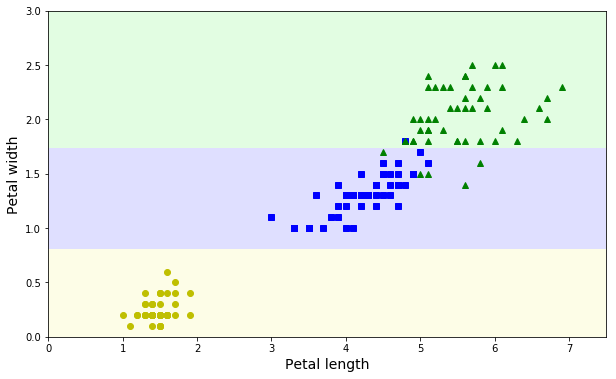

In [10]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(clf_tree, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

Predict the probability of each class for [5, 1.5]

In [11]:
clf_tree.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Run next cell to generate 100 moon data at noise=0.25 and random_state=53

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=53)

Now fit two decision tree model. One has no restriction, and another has min_samples_leaf = 4

In [13]:
clf_tree = DecisionTreeClassifier()
clf_tree_4 = DecisionTreeClassifier(min_samples_leaf=4)
clf_tree.fit(X, y)
clf_tree_4.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now use function plot_decision_boundary to visualize and compare these two models. Check for overfitting.

Text(0.5,1,'min_samples_leaf=4')

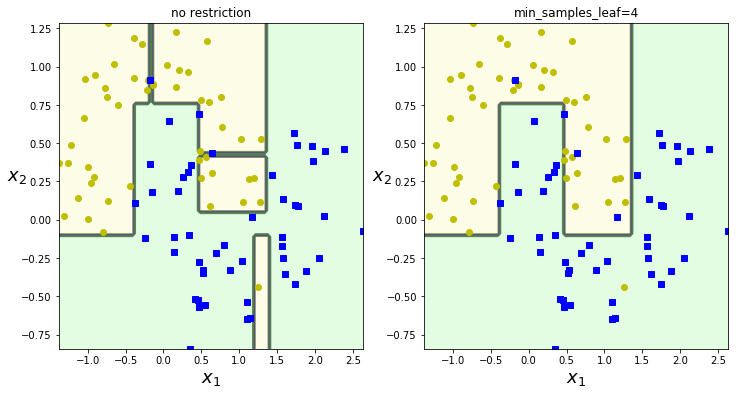

In [14]:
limit = [X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()]
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_decision_boundary(clf_tree, X, y, axes=limit, iris=False)
plt.title('no restriction')
plt.subplot(122)
plot_decision_boundary(clf_tree_4, X, y, axes=limit, iris=False)
plt.title('min_samples_leaf=4')

# Regression

Run next cell to generate synthetic data

In [15]:
#
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
y = y.ravel()

Fit two regression trees. The first three have max_depth of 2, 3, 5; and the last one has no restriction.

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
reg_tree_2 = DecisionTreeRegressor(max_depth=2)
reg_tree_3 = DecisionTreeRegressor(max_depth=3)
reg_tree_5 = DecisionTreeRegressor(max_depth=5)
reg_tree_none = DecisionTreeRegressor()

In [18]:
reg_tree_2.fit(X, y)
reg_tree_3.fit(X, y)
reg_tree_5.fit(X, y)
reg_tree_none.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Now visualize these four trees by the function of plot_regression_predictions

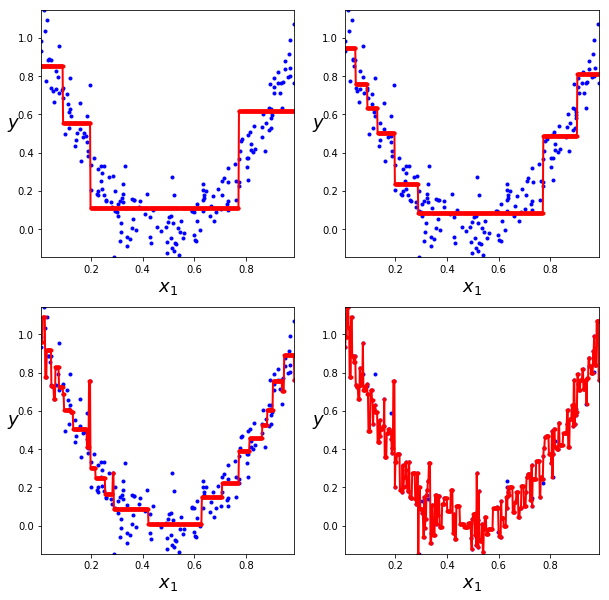

In [19]:
limit = [X.min(), X.max(), y.min(), y.max()]
plt.figure(figsize=(10, 10))
plt.subplot(221)
plot_regression_predictions(reg_tree_2, X, y, axes=limit)
plt.subplot(222)
plot_regression_predictions(reg_tree_3, X, y, axes=limit)
plt.subplot(223)
plot_regression_predictions(reg_tree_5, X, y, axes=limit)
plt.subplot(224)
plot_regression_predictions(reg_tree_none, X, y, axes=limit)